In [5]:
import pandas as pd
import numpy as np

# 隨機生成數值 

In [120]:
pop = np.random.randint(1,2000, size = 3) * 10000
print(pop)

[16630000 13900000  5240000]


In [121]:
data = {'國家': ['Taiwan', 'America', 'Tailand'] ,
        '人口': [pop[0], pop[1], pop[2]]}
data = pd.DataFrame(data)
print(data)


        國家        人口
0   Taiwan  16630000
1  America  13900000
2  Tailand   5240000


# 查找人口最大值標籤

In [122]:
data['人口'].idxmax()

0

# 根據標籤打印出colums

In [124]:
data.loc[0]

國家      Taiwan
人口    16630000
Name: 0, dtype: object

In [1]:
with open('../data/imagenet_urls_examples.txt','r', encoding = "utf8") as f:
    data = f.readlines()
print(data[5])

n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg



In [2]:
data = [['ID', 'Url']]
with open('../data/imagenet_urls_examples.txt','r', encoding = "utf8") as f:
    for line in f: 
        line = line.replace('\n','').split('\t')  # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data[5]

['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

In [6]:
df = pd.DataFrame(data[2:])     #取欄位 [2:end_columns]
df.columns = data[0]            #取第一個row為columns
df.loc[0:5]


,ID,Url
0,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
1,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
2,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
3,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
4,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
5,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...


# 使用 Request 抓取資料


In [12]:
import pandas as pd
import requests
import numpy as np

In [13]:
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [26]:
response = requests.get(target_url)
data = response.text

#用request傳送回來的絲料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

# 字符串分割

In [27]:
L=[ ['ID', 'Url'] ]
data = data.split('\n')
for i in data:
    i = i.split('\t')
    L.append(i)
L
df = pd.DataFrame(L[2:])     #取欄位 [2:end_columns]
df.columns = L[0]            #取第一個row為columns
df.loc[1]

ID                                         n00015388_304
Url    http://farm1.static.flickr.com/27/51009336_a96...
Name: 1, dtype: object

# 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


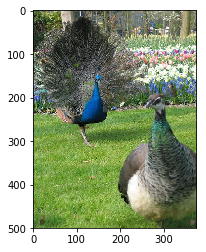

In [18]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt


#請用df.loc[...]得到第一筆資料

first_link = df.loc[1][1]  #來取得單一值


response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

img = np.array(img)

plt.imshow(img)
plt.show

print(df.loc[1][1])

#df['Url'].tolist #取得Url這個columns的所有值

In [22]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args    Args

        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    
    for val in url_list:
        response2 = requests.get(val)
        img_list.append(Image.open(BytesIO(response2.content)));
        
        
        
    return img_list

In [23]:
df.loc[500:502]['Url']

500    http://farm4.static.flickr.com/3217/2335761864...
501    http://www.photophoto.cn/m72/018/056/018056009...
502    http://farm1.static.flickr.com/135/335229080_0...
Name: Url, dtype: object

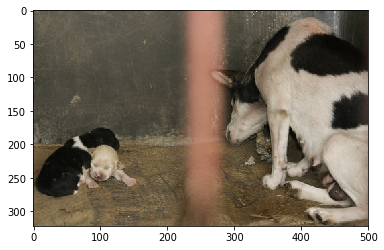

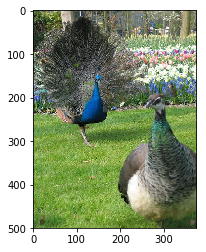

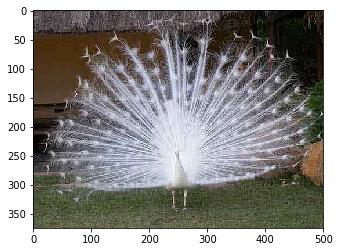

內容成功


In [24]:
df
imgz = img2arr_fromURLs(df.loc[0:2]['Url'])
        
try:
    for val in imgz:
        plt.imshow(val)
        plt.show()
        
except OSError :
    print('網址失效')
    
else :
    print('內容成功')
    

    